In [60]:
#Classification of Real & Fake Bank notes to understand & Visualize "Decision Tree Algorithm"
import numpy as np
import pandas as pd

In [61]:
#reading the csv file
data=pd.read_csv('bank_notes.csv')

In [62]:
##actions to understand data

In [63]:
data.head()

,variance,skewness,curtosis,entropy,Target
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [64]:
data.describe()

,variance,skewness,curtosis,entropy,Target
count,1372.000000,1372.000000,1372.000000,1372.000000,1372.000000
mean,0.433735,1.922353,1.397627,-1.191657,0.444606
std,2.842763,5.869047,4.310030,2.101013,0.497103
min,-7.042100,-13.773100,-5.286100,-8.548200,0.000000
25%,-1.773000,-1.708200,-1.574975,-2.413450,0.000000
50%,0.496180,2.319650,0.616630,-0.586650,0.000000
75%,2.821475,6.814625,3.179250,0.394810,1.000000
max,6.824800,12.951600,17.927400,2.449500,1.000000


In [65]:
#outliers remval
data= data[data['curtosis']<12]

In [66]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1339 entries, 0 to 1371
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   variance  1339 non-null   float64
 1   skewness  1339 non-null   float64
 2   curtosis  1339 non-null   float64
 3   entropy   1339 non-null   float64
 4   Target    1339 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 62.8 KB


In [67]:
data.columns

Index(['variance', 'skewness', 'curtosis', 'entropy', 'Target'], dtype='object')

In [68]:
data.shape

(1339, 5)

In [69]:
#what are the type of output
data['Target'].unique()
# 0 represents genuine and 1 represents counterfeit/fake banknote.

array([0, 1], dtype=int64)

In [70]:
#how many real & fake notes are there
data['Target'].value_counts()

0    762
1    577
Name: Target, dtype: int64

In [101]:
#check for null values in each column
data.isnull().sum()

variance    0
skewness    0
curtosis    0
entropy     0
Target      0
dtype: int64

In [71]:
# Data Visualization

In [72]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

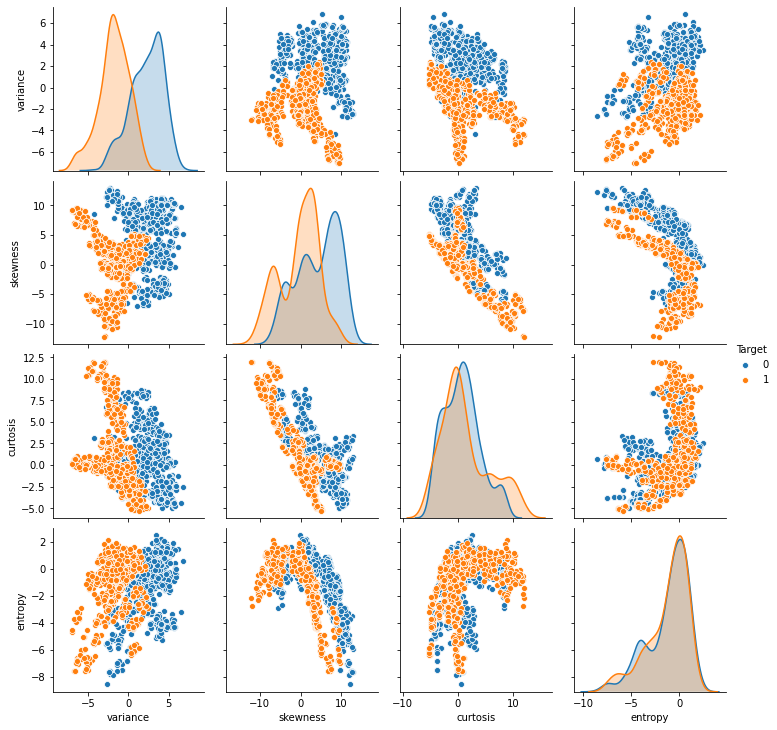

In [73]:
#pairplot
sns.pairplot(data,hue='Target')

In [74]:
#boxplot to visualize distribution of data & compare with respect to different columns

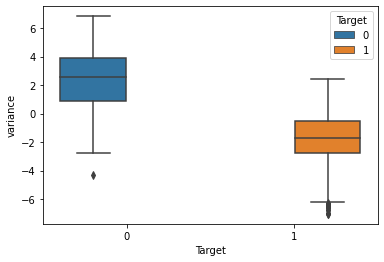

In [75]:
sns.boxplot(x='Target',y='variance',data=data,hue='Target')
#low varience = fake note

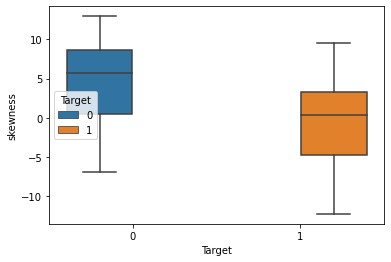

In [76]:
sns.boxplot(x='Target',y='skewness',data=data,hue='Target')
#low skewness = fake note

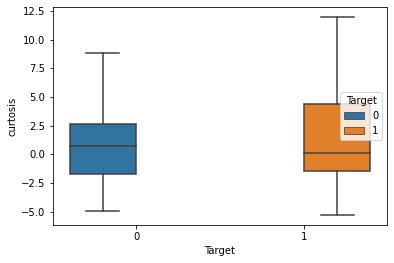

In [77]:
sns.boxplot(x='Target',y='curtosis',data=data,hue='Target')
#high curtosis = fake note

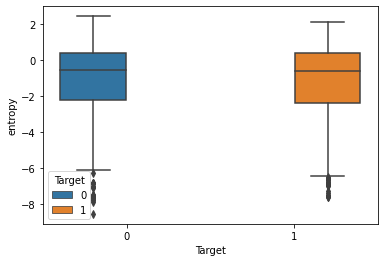

In [78]:
sns.boxplot(x='Target',y='entropy',data=data,hue='Target')
#can't decide

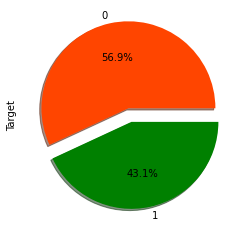

In [79]:
#pie plot to show the overall types of note classifications
colors = ['#FF4500','green']
data['Target'].value_counts().plot(kind = 'pie',  autopct = '%1.1f%%', shadow = True,colors=colors, explode = [0.08,0.08])

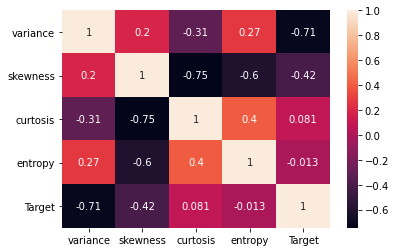

In [80]:
#heat plot for data to understand inter depandancy of data columns 
heatmp = data.corr()
sns.heatmap(heatmp,annot=True)
#no data columns are correlated

In [81]:
#defining independent and dependent variables

In [82]:
x=data.drop(columns=['Target'])
y=data['Target']

In [83]:
x.head()

,variance,skewness,curtosis,entropy
0,3.62160,8.6661,-2.8073,-0.44699
1,4.54590,8.1674,-2.4586,-1.46210
2,3.86600,-2.6383,1.9242,0.10645
3,3.45660,9.5228,-4.0112,-3.59440
4,0.32924,-4.4552,4.5718,-0.98880


In [84]:
y.tail()

1365    1
1366    1
1367    1
1368    1
1371    1
Name: Target, dtype: int64

In [85]:
#splitting the dataset into training and test sets

In [86]:
from sklearn.model_selection import train_test_split

In [87]:
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.2)
#80% traning data & 20% testing data

In [88]:
#Defining the decision tree classifier and fitting the training set

In [89]:
from sklearn.tree import DecisionTreeClassifier

In [90]:
dt=DecisionTreeClassifier()

In [91]:
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [92]:
#Plotting & Visualizing the Decision Tree

In [93]:
from sklearn import tree

In [94]:
f_n=['variance', 'skewness', 'curtosis', 'entropy']
c_n=data['Target'].unique().astype(str)

[Text(1414.9285714285713, 1528.875, 'variance <= 0.32\ngini = 0.492\nsamples = 1071\nvalue = [605, 466]\nclass = 0'),
 Text(946.6071428571428, 1325.025, 'skewness <= 7.574\ngini = 0.302\nsamples = 497\nvalue = [92, 405]\nclass = 1'),
 Text(657.6428571428571, 1121.175, 'variance <= -0.459\ngini = 0.129\nsamples = 419\nvalue = [29, 390]\nclass = 1'),
 Text(318.85714285714283, 917.3249999999999, 'curtosis <= 6.219\ngini = 0.056\nsamples = 344\nvalue = [10, 334]\nclass = 1'),
 Text(159.42857142857142, 713.475, 'skewness <= 7.293\ngini = 0.008\nsamples = 255\nvalue = [1, 254]\nclass = 1'),
 Text(79.71428571428571, 509.625, 'gini = 0.0\nsamples = 252\nvalue = [0, 252]\nclass = 1'),
 Text(239.1428571428571, 509.625, 'curtosis <= 0.166\ngini = 0.444\nsamples = 3\nvalue = [1, 2]\nclass = 1'),
 Text(159.42857142857142, 305.7750000000001, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]\nclass = 1'),
 Text(318.85714285714283, 305.7750000000001, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]\nclass = 0'),
 Text

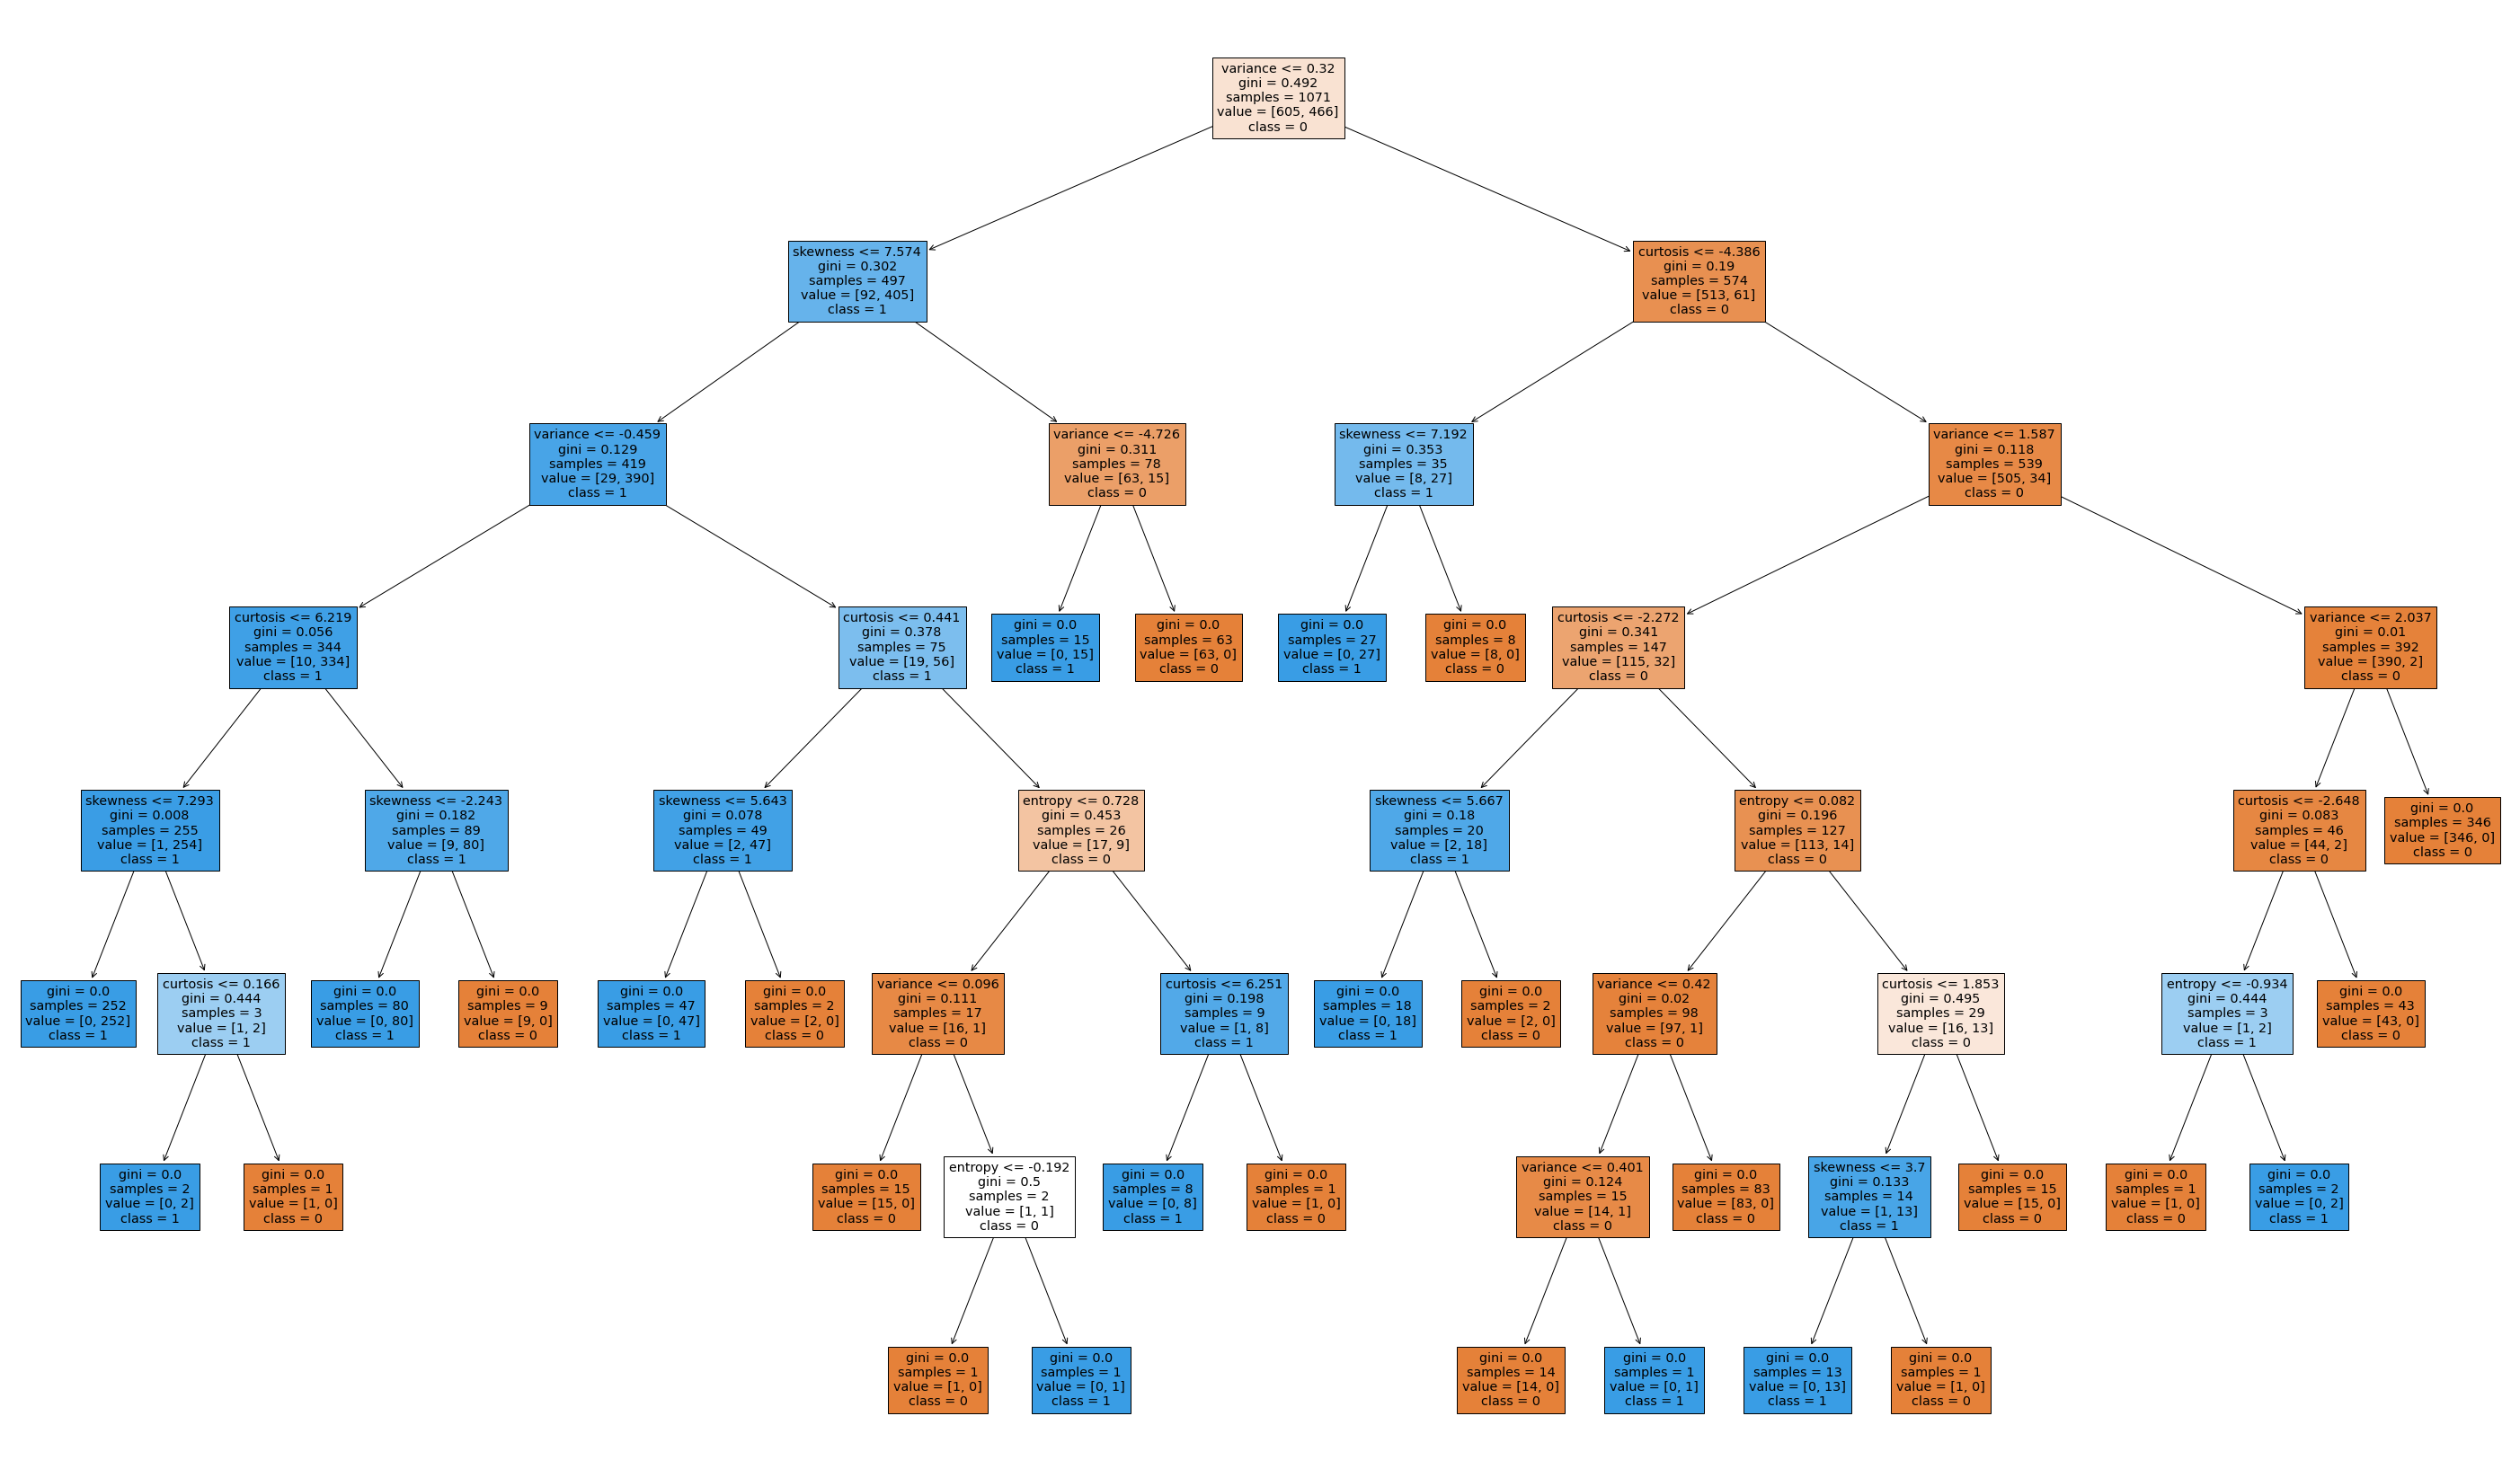

In [95]:
plt.figure(figsize=(50,30))
tree.plot_tree(dt, filled=True, feature_names=f_n, class_names=c_n)

In [96]:
#Prediction on test data

In [97]:
y_pred=dt.predict(x_test)

In [98]:
#to check the accracy of our algorithm
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)
#our model is giving 94.11% accuracy with the help of decision tree

0.9692431284787972

In [99]:
#now to test our model lets make a python function
def ans(v,s,c,e):
    x=dt.predict([[v,s,c,e]])
    if x==0:
        print("Prediction: Real Note")
    else:
        print("Prediction Fake Note")

In [100]:
#Testing

In [102]:
#test should give real note(taken from dataset)
ans(3.9294,1.4112,1.8076,0.89782)

Prediction: Real Note


In [103]:
#test should give fake note(taken from dataset)
ans(0.009661,3.5612,-4.407,-4.4103)

Prediction Fake Note


In [105]:
#test with random input
ans(0.0066,4.198,-3.131,-2.8171)
ans(2.56161,1.2333,1.0981,0.7654)

Prediction Fake Note
Prediction: Real Note


In [ ]:
#THANK YOU